## Exploratory analysis of Titanic data


In [191]:
#libraries
import numpy as np
import pandas as pd
from IPython.display import display
from ydata_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)





In [192]:
#source
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)#,index_col=0,parse_dates=[0])



In [193]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [194]:
def clean_data(df):
    df['Relatives'] = df['SibSp']+df['Parch']
    df['Title'] = df['Name'].apply(lambda a: a.split(',')[1].split('.')[0].strip()) #item 1 gives 2nd word
    df['Embarked'] = df['Embarked'].apply(lambda a: 'Cherbourg' if a == 'C' 
                                           else 'Queenstown' if a == 'Q' 
                                           else 'Southampton' if a =='S' 
                                           else 'Unknown')
    df['Sex'] = df['Sex'].apply(lambda a: 'F' if a =='female' else 'M')
    df['Age'] = df['Age'].round(0)
    df['Fare'] = df['Fare'].round(1)
    df['Cabin_Level']= df['Cabin'].fillna('1').astype(str).apply(lambda a: a[0]).replace('1','Unknown') #NaN to unknown
    df.drop(['Ticket','SibSp','Parch','Name','Cabin','PassengerId'],inplace=True,axis=1)
    #df = df.sort_values(by = 'Age',ascending=True)
    display(df.head(20))
clean_data(df)



,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives,Title,Cabin_Level
0,0,3,M,22.0,7.2,Southampton,1,Mr,Unknown
1,1,1,F,38.0,71.3,Cherbourg,1,Mrs,C
2,1,3,F,26.0,7.9,Southampton,0,Miss,Unknown
3,1,1,F,35.0,53.1,Southampton,1,Mrs,C
4,0,3,M,35.0,8.0,Southampton,0,Mr,Unknown
5,0,3,M,NaN,8.5,Queenstown,0,Mr,Unknown
6,0,1,M,54.0,51.9,Southampton,0,Mr,E
7,0,3,M,2.0,21.1,Southampton,4,Master,Unknown
8,1,3,F,27.0,11.1,Southampton,2,Mrs,Unknown
9,1,2,F,14.0,30.1,Cherbourg,1,Mrs,Unknown


In [195]:
#df.describe()
df.info()

### data preparation plan
#replace null ages with best guess logic
#sum sibs/parch
#extract title (to aid with age logic)
#format cabin/ embarked
#remove ticket
#round ages to floor



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    object 
 6   Relatives    891 non-null    int64  
 7   Title        891 non-null    object 
 8   Cabin_Level  891 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [196]:
#generate median age per variable groups to join into those with no age

#explore missing age records
df[df['Age'].isna()].head(20) #potential useful -> pclass, embarked, sex, title/young/old title?

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives,Title,Cabin_Level
5,0,3,M,NaN,8.5,Queenstown,0,Mr,Unknown
17,1,2,M,NaN,13.0,Southampton,0,Mr,Unknown
19,1,3,F,NaN,7.2,Cherbourg,0,Mrs,Unknown
26,0,3,M,NaN,7.2,Cherbourg,0,Mr,Unknown
28,1,3,F,NaN,7.9,Queenstown,0,Miss,Unknown
29,0,3,M,NaN,7.9,Southampton,0,Mr,Unknown
31,1,1,F,NaN,146.5,Cherbourg,1,Mrs,B
32,1,3,F,NaN,7.8,Queenstown,0,Miss,Unknown
36,1,3,M,NaN,7.2,Cherbourg,0,Mr,Unknown
42,0,3,M,NaN,7.9,Cherbourg,0,Mr,Unknown


In [197]:
#age1 contains only known age records
# create grouping by useful cars to crossjoin back to main
age1 = df[df['Age']>=0]

# title
title = pd.concat([
    age1.groupby(['Title'])['Age'].median().rename('median'),
    age1.groupby(['Title'])['Age'].count().rename('ct'),
          ],axis=1)

title.merge(
    pd.DataFrame(df[df['Age'].isna()].groupby(['Title'])['Survived'].count().rename('null values')), #count tot num of missing values by title
    on='Title', how='left') # consolidate titles to young/ old (master/miss vs rest)

,median,ct,null values
Title,,,
Capt,70.0,1,NaN
Col,58.0,2,NaN
Don,40.0,1,NaN
Dr,46.5,6,1.0
Jonkheer,38.0,1,NaN
Lady,48.0,1,NaN
Major,48.5,2,NaN
Master,3.5,36,4.0
Miss,21.0,146,36.0


In [198]:
# helper title for 'young titles'

df['young'] = np.isin(df['Title'],['Master','Miss','Mlle','Ms']) #included various spellings for Miss
age1 = df[df['Age']>=0] #brings in young col


ytitle = pd.concat([
    age1.groupby(['young'])['Age'].median().rename('median'),
    age1.groupby(['young'])['Age'].count().rename('ct'),
          ],axis=1)

ytitle.merge(
    pd.DataFrame(df[df['Age'].isna()].groupby(['young'])['Survived'].count().rename('null values')), #count tot num of missing values by title
    on='young', how='left')




,median,ct,null values
young,,,
False,31.0,529,137
True,18.0,185,40


In [199]:

# best mix of vars that give reasonable sample of median age by group
age2 = pd.concat([
  #  age1.groupby(['young','Sex','Pclass'])['Age'].count().rename('count'),
    age1.groupby(['young','Sex','Pclass'])['Age'].median().rename('median age').astype(int).rename('age_fill_raw')
   # age1.groupby(['young','Sex','Pclass'])['Age'].mean().rename('mean age').astype(int),
   # age1.groupby(['young','Sex','Pclass'])['Age'].min().rename('min').astype(int),
   # age1.groupby(['young','Sex','Pclass'])['Age'].max().rename('max').astype(int),
],axis=1) #median seems valid choice for crossjoin to df. vol size per group seems ok and median less prone to outliers

#commented out view of other variables during testing
age2


age_fill_raw
young Sex Pclass              
False F   1                 41
          2                 32
          3                 31
      M   1                 42
          2                 31
          3                 26
True  F   1                 30
          2                 24
          3                 18
      M   1                  4
          2                  1
          3                  4

In [200]:
clean_df = df.merge(age2, on = ['young','Sex','Pclass'],how='left')
clean_df['Age_fill'] = clean_df['Age'].fillna(clean_df['age_fill_raw']).astype(int)
clean_df = clean_df.drop(['age_fill_raw','Age','young'],axis=1)
labs = ['<10','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80+']
clean_df['Age_fill_gp'] = pd.cut(clean_df['Age_fill'],
                                 bins = list(range(0,100,10)),
                                 include_lowest=True,
                                 right=False,
                                 precision=0,
                                 labels=labs)

clean_df.head(15)

,Survived,Pclass,Sex,Fare,Embarked,Relatives,Title,Cabin_Level,Age_fill,Age_fill_gp
0,0,3,M,7.2,Southampton,1,Mr,Unknown,22,20-29
1,1,1,F,71.3,Cherbourg,1,Mrs,C,38,30-39
2,1,3,F,7.9,Southampton,0,Miss,Unknown,26,20-29
3,1,1,F,53.1,Southampton,1,Mrs,C,35,30-39
4,0,3,M,8.0,Southampton,0,Mr,Unknown,35,30-39
5,0,3,M,8.5,Queenstown,0,Mr,Unknown,26,20-29
6,0,1,M,51.9,Southampton,0,Mr,E,54,50-59
7,0,3,M,21.1,Southampton,4,Master,Unknown,2,<10
8,1,3,F,11.1,Southampton,2,Mrs,Unknown,27,20-29
9,1,2,F,30.1,Cherbourg,1,Mrs,Unknown,14,10-19


### plotting cleaned variables. Any relationships?

/Users/jcowper/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


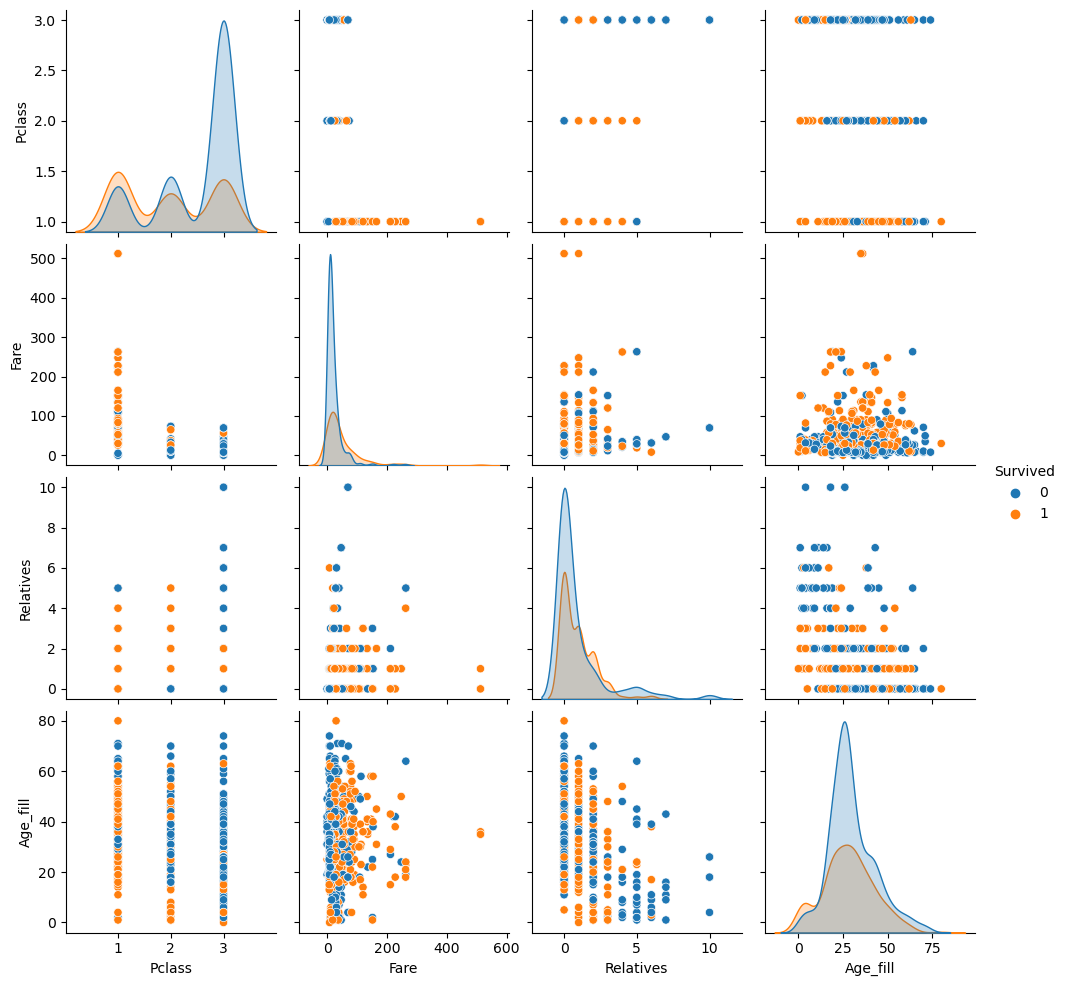

In [201]:
# sns.pairplot(clean_df,vars=['Pclass','Sex','Fare','Embarked','Relatives','Title','Cabin_Level','Age_fill','Survived'])
sns.pairplot(clean_df,hue='Survived') #numeric data

# still need to look at age groups, title, embarked cabin_level, sex

[Text(0.5, 1.0, 'Variable correlations')]

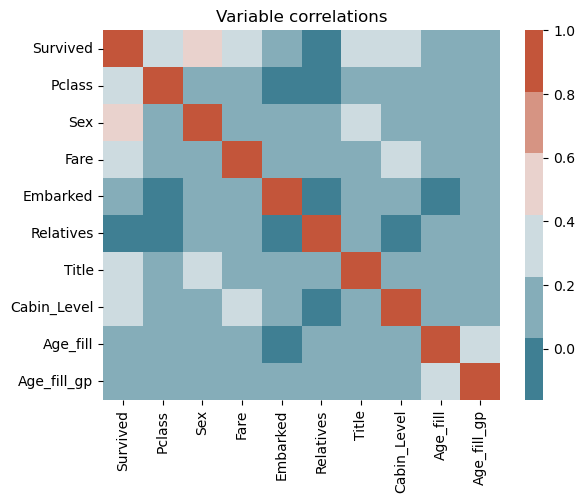

In [202]:
# generate some explorative plots (manually)

# relationship between variables -> corrplot
#corr_df = clean_df.corr() excludes categoricals
#sns.heatmap(corr_df,cmap=sns.diverging_palette(220,20)).set(title='Correlations') # correlation between survived/age, survived/fare, class/survived

corr_df_cat = clean_df.apply(lambda a : pd.factorize(a)[0]).corr(method='pearson', min_periods=1) #use pearson
sns.heatmap(corr_df_cat,cmap=sns.diverging_palette(220,20)).set(title='Variable correlations')

# comments: pclass, age_fill, sex, relatives


In [203]:
clean_df.head()
clean_df.dtypes

Survived          int64
Pclass            int64
Sex              object
Fare            float64
Embarked         object
Relatives         int64
Title            object
Cabin_Level      object
Age_fill          int64
Age_fill_gp    category
dtype: object

[Text(0.5, 1.0, 'Age')]

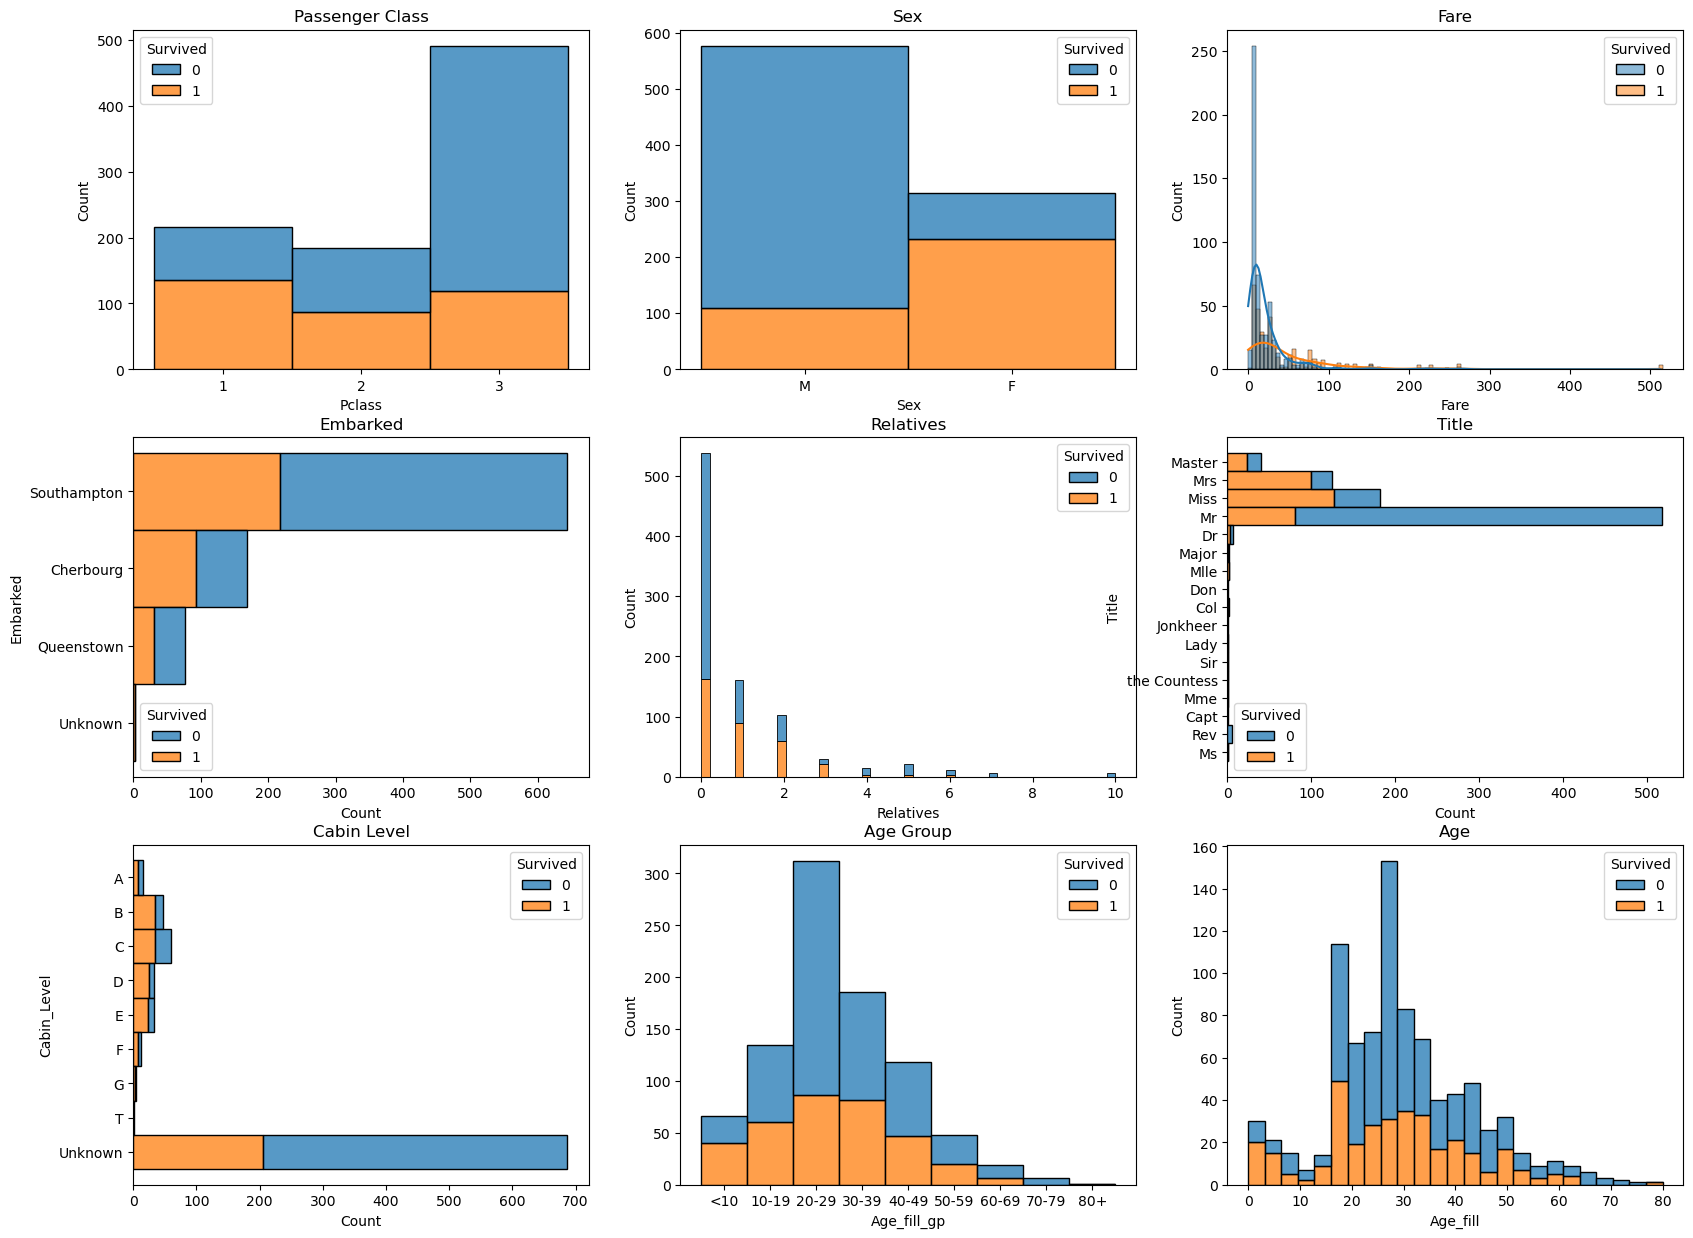

In [244]:
# of particular interest? sex, class, fare, relatives, age

fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(ncols=3,nrows=3,figsize=(20,15))

clean_df.sort_values('Pclass', inplace=True, ascending=True)
sns.histplot(clean_df,x=clean_df['Pclass'].astype(str),hue='Survived',multiple='stack',ax=ax1).set(title='Passenger Class')

sns.histplot(clean_df,x='Sex',hue='Survived',multiple='stack',ax=ax2).set(title='Sex')
sns.histplot(clean_df,x='Fare',hue='Survived',kde=True,binwidth=5,ax=ax3).set(title='Fare')
sns.histplot(clean_df,y='Embarked',hue='Survived',multiple='stack',ax=ax4).set(title='Embarked')
sns.histplot(clean_df,x='Relatives',hue='Survived',multiple='stack',ax=ax5).set(title='Relatives')
sns.histplot(clean_df,y='Title',hue='Survived',multiple='stack',ax=ax6).set(title='Title')

clean_df.sort_values('Cabin_Level', inplace=True, ascending=True)
sns.histplot(clean_df,y='Cabin_Level',hue='Survived',multiple='stack',ax=ax7).set(title='Cabin Level')

sns.histplot(clean_df,x='Age_fill_gp',hue='Survived',multiple='stack',ax=ax8).set(title='Age Group')
sns.histplot(clean_df,x='Age_fill',hue='Survived',multiple='stack',ax=ax9).set(title='Age')











/Users/jcowper/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


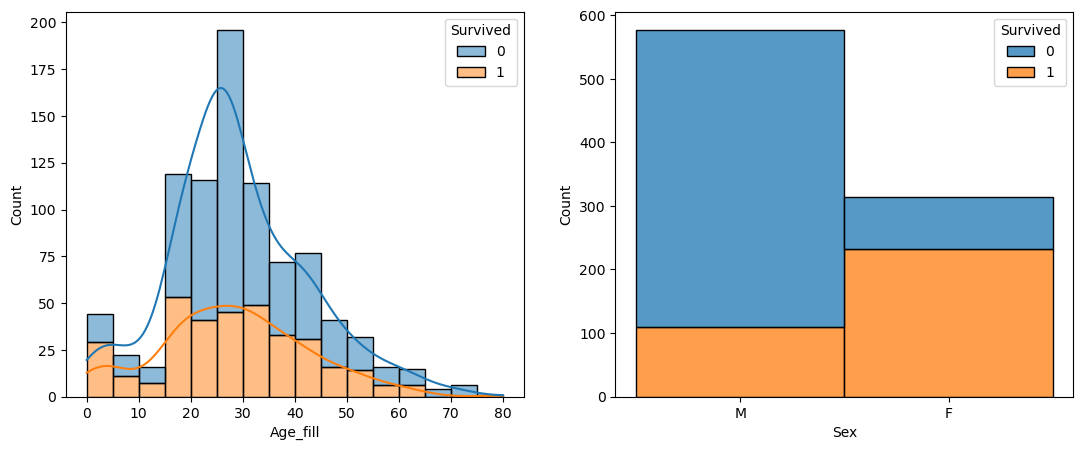

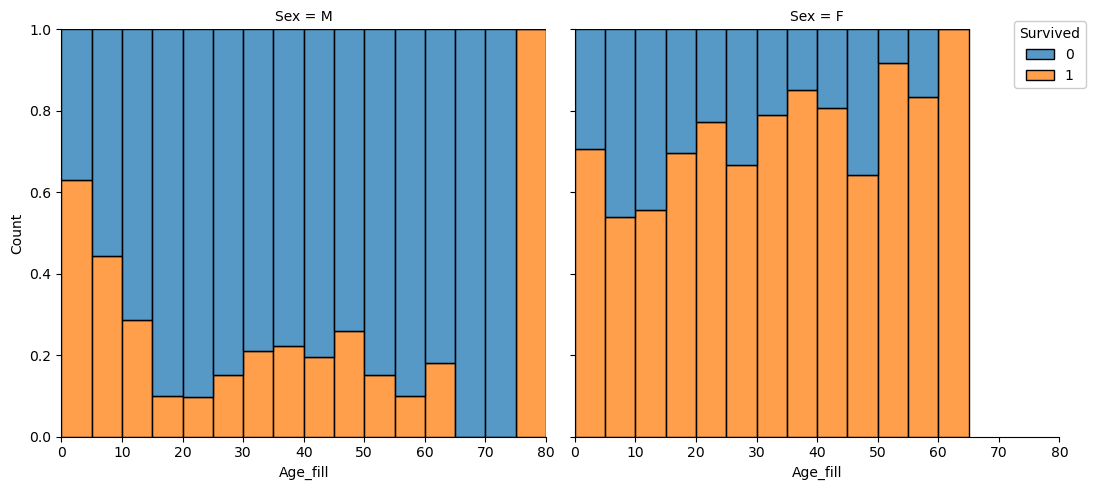

In [205]:
# of particular interest? sex, class, fare, relatives, age

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(13,5))
a = sns.histplot(clean_df,x='Age_fill',hue='Survived',kde=True,binwidth=5,multiple='stack',ax=ax1)
b = sns.histplot(clean_df,x='Sex',hue='Survived',multiple='stack',ax=ax2) #we can see most women survived
c= sns.displot(clean_df,x='Age_fill',hue='Survived',col='Sex',multiple='fill',binwidth=5,height=5,aspect=1.1)
sns.move_legend(c, "lower center",frameon=True,bbox_to_anchor=(0.9,0.8),framealpha=1)



In [206]:
clean_df.head()

,Survived,Pclass,Sex,Fare,Embarked,Relatives,Title,Cabin_Level,Age_fill,Age_fill_gp
445,1,1,M,81.9,Southampton,2,Master,A,4,<10
310,1,1,F,83.2,Cherbourg,0,Miss,C,24,20-29
309,1,1,F,56.9,Cherbourg,0,Miss,E,30,30-39
307,1,1,F,108.9,Cherbourg,1,Mrs,C,17,10-19
306,1,1,F,110.9,Cherbourg,0,Miss,Unknown,30,30-39


TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

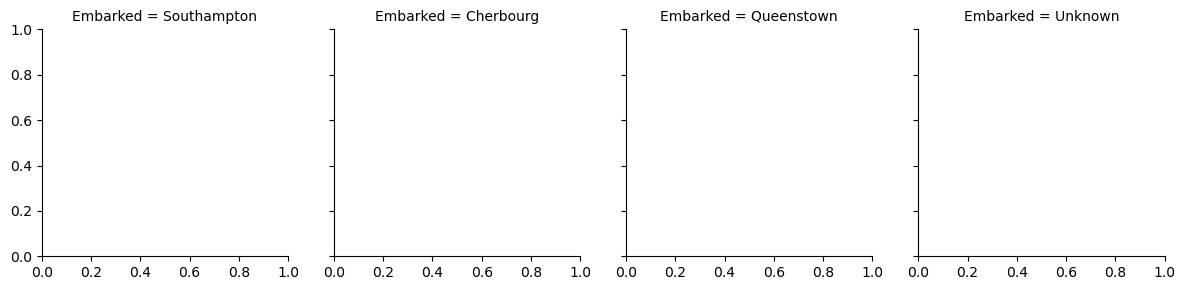

In [207]:
sns.FacetGrid(clean_df,col='Embarked',hue='Survived').map(plt.scatter())
plt.show()

In [ ]:

# fig, axs = plt.subplots(len(clean_df.columns))
# fig.suptitle('Vertically stacked subplots')

# for i in clean_df.columns.values[1:len(clean_df.columns)]:
#     plt.figure()
#     sns.histplot(data=clean_df,x=[i],hue='Survived')
clean_df.plot(subplots=True,layout=(3,2))

In [ ]:
#ProfileReport(df, title="Profiling Report")
ProfileReport(clean_df, title="Profiling Report")